In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv("data/alim.csv", sep=';')

# Supprimez les lignes avec des codes postaux non numériques
data = data[data['Code_postal'].astype(str).apply(lambda x: x.isnumeric())]

# Préparation des données
X = data[['Code_postal', 'Libelle_commune', 'Date_inspection', 'APP_Libelle_activite_etablissement', 'geores', 'filtre', 'ods_type_activite']].copy()
y = data['Synthese_eval_sanit'].values

# Encodage one-hot des variables catégoriques
cat_cols = ['Libelle_commune', 'APP_Libelle_activite_etablissement', 'geores', 'filtre', 'ods_type_activite']
num_cols = ['Code_postal']

# Transformation de X en un DataFrame avec les noms de colonnes
X = pd.DataFrame(X, columns=['Code_postal', 'Libelle_commune', 'Date_inspection', 'APP_Libelle_activite_etablissement', 'geores', 'filtre', 'ods_type_activite'])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_cols), ('scaler', StandardScaler(), num_cols)], remainder='passthrough')
X = ct.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques de performance
r2 = r2_score(y_test, y_pred)

# Affichage des métriques de performance
print("R-squared:", r2)

# Affichage des résultats de la régression linéaire
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Régression linéaire sur votre variable cible')
plt.grid(True)
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Charger les données
data = pd.read_csv("data/alim.csv", sep=';')

# Remplacer les valeurs manquantes dans les colonnes numériques par la médiane
numerical_columns = ["Code_postal"]
numerical_imputer = SimpleImputer(strategy="median")
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Remplacer les valeurs manquantes dans les colonnes catégorielles par une valeur spécifique, par exemple "Inconnu"
categorical_columns = ["Libelle_commune", "APP_Libelle_activite_etablissement", "ods_type_activite"]
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Inconnu")
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encoder les colonnes catégorielles
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Séparer les données en ensembles d'entraînement et de test
X = data.drop(columns=["Synthese_eval_sanit", "SIRET", "Date_inspection", "geores", "filtre"])
y = data["Synthese_eval_sanit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importer les modèles
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner les modèles
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")


ValueError: Input contains NaN

In [12]:
# Utilisez .isna().sum() pour compter les valeurs manquantes dans chaque colonne
missing_values = data.isna().sum()

# Ou utilisez .isnull().sum() qui est équivalent
# missing_values = data.isnull().sum()

# Affichez les colonnes avec des valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_values[missing_values > 0])


Colonnes avec des valeurs manquantes :
SIRET                    25
Date_inspection          25
Synthese_eval_sanit      25
geores                  761
filtre                 8658
dtype: int64


In [13]:
import pandas as pd

# Charger les données
data = pd.read_csv("data/alim.csv", sep=';')

# Supprimer les lignes avec des valeurs manquantes dans les colonnes SIRET, Date_inspection, Synthese_eval_sanit, geores et filtre
data.dropna(subset=["SIRET", "Date_inspection", "Synthese_eval_sanit", "geores", "filtre"], inplace=True)

# Sauvegarder les données nettoyées dans un nouveau fichier CSV
data.to_csv("data/alim_cleaned.csv", index=False, sep=';')


Decision Tree Accuracy: 0.6024224394390141
Decision Tree Classification Report:
                               precision    recall  f1-score   support

                  A améliorer       0.15      0.12      0.14       321
A corriger de manière urgente       0.00      0.00      0.00        22
                 Satisfaisant       0.67      0.77      0.72      2789
            Très satisfaisant       0.54      0.41      0.46      1574

                     accuracy                           0.60      4706
                    macro avg       0.34      0.33      0.33      4706
                 weighted avg       0.58      0.60      0.59      4706

Logistic Regression Accuracy: 0.5926476838079048
Logistic Regression Classification Report:
                               precision    recall  f1-score   support

                  A améliorer       0.00      0.00      0.00       321
A corriger de manière urgente       0.00      0.00      0.00        22
                 Satisfaisant       0.59   

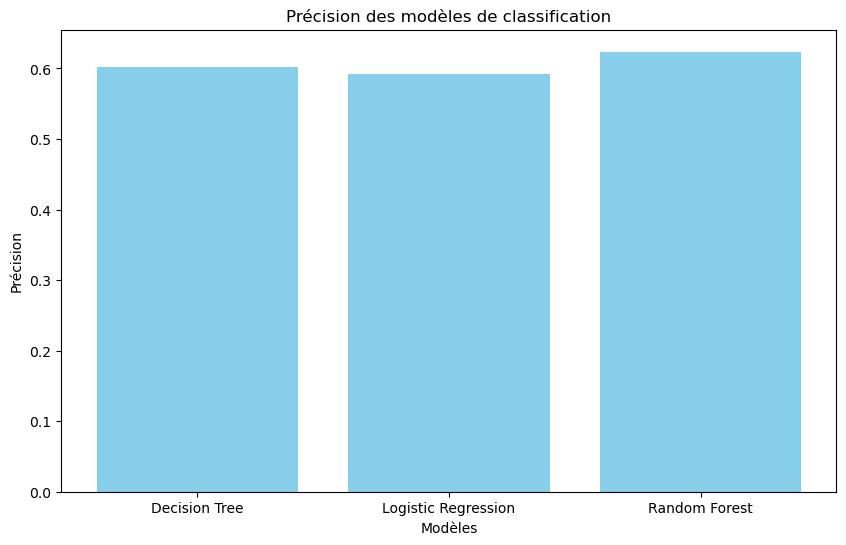

In [17]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
data = pd.read_csv("data/alim_cleaned.csv", sep=';')

# Remplacer les valeurs manquantes dans les colonnes numériques par la médiane
numerical_columns = ["Code_postal"]
numerical_imputer = SimpleImputer(strategy="median")
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Remplacer les valeurs manquantes dans les colonnes catégorielles par une valeur spécifique, par exemple "Inconnu"
categorical_columns = ["Libelle_commune", "APP_Libelle_activite_etablissement", "ods_type_activite"]
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Inconnu")
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encoder les colonnes catégorielles
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Séparer les données en ensembles d'entraînement et de test
X = data.drop(columns=["Synthese_eval_sanit", "SIRET", "Date_inspection", "geores", "filtre"])
y = data["Synthese_eval_sanit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importer les modèles
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner les modèles
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Stocker les résultats pour la création de graphiques
model_names = []
accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(model_name)
    accuracies.append(accuracy)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

# Créer un graphique des précisions
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Précision des modèles de classification')
plt.show()


Decision Tree Accuracy: 0.5981725456863578
Decision Tree Classification Report:
                               precision    recall  f1-score   support

                  A améliorer       0.15      0.12      0.13       321
A corriger de manière urgente       0.00      0.00      0.00        22
                 Satisfaisant       0.66      0.77      0.71      2789
            Très satisfaisant       0.53      0.40      0.46      1574

                     accuracy                           0.60      4706
                    macro avg       0.34      0.32      0.33      4706
                 weighted avg       0.58      0.60      0.58      4706

Logistic Regression Accuracy: 0.5926476838079048
Logistic Regression Classification Report:
                               precision    recall  f1-score   support

                  A améliorer       0.00      0.00      0.00       321
A corriger de manière urgente       0.00      0.00      0.00        22
                 Satisfaisant       0.59   

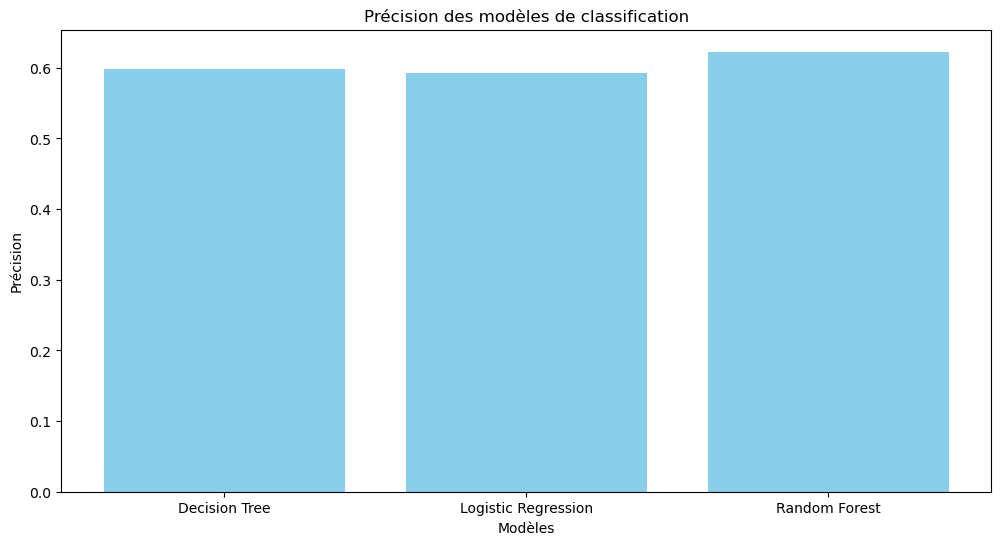

In [32]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Charger les données
data = pd.read_csv("data/alim_cleaned.csv", sep=';')

# Remplacer les valeurs manquantes dans les colonnes numériques par la médiane
numerical_columns = ["Code_postal"]
numerical_imputer = SimpleImputer(strategy="median")
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Remplacer les valeurs manquantes dans les colonnes catégorielles par une valeur spécifique, par exemple "Inconnu"
categorical_columns = ["Libelle_commune", "APP_Libelle_activite_etablissement", "ods_type_activite"]
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Inconnu")
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encoder les colonnes catégorielles
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Séparer les données en ensembles d'entraînement et de test
X = data.drop(columns=["Synthese_eval_sanit", "SIRET", "Date_inspection", "geores", "filtre"])
y = data["Synthese_eval_sanit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importer les modèles
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner les modèles
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Stocker les résultats pour la création de graphiques
model_names = []
accuracies = []

# Stocker les prédictions pour chaque modèle
predictions = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(model_name)
    accuracies.append(accuracy)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Stocker les probabilités prédites pour ce modèle
    predictions[model_name] = model.predict_proba(X_test)

# Créer un graphique de comparaison de précision
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Précision des modèles de classification')
plt.show()
# Charger les données originales pour obtenir la colonne "APP_Libelle_activite_etablissement"
original_data = pd.read_csv("data/alim_cleaned.csv", sep=';')

# Stocker les prédictions pour chaque modèle dans des fichiers CSV
for model_name, class_probs in predictions.items():
    # Créer un DataFrame avec les probabilités prédites
    prob_df = pd.DataFrame(class_probs)
    
    # Ajouter une colonne avec les vraies étiquettes (y_test)
    prob_df['True_Labels'] = y_test.reset_index(drop=True)
    
    # Ajouter la colonne "APP_Libelle_activite_etablissement" au DataFrame
    prob_df['APP_Libelle_activite_etablissement'] = original_data["APP_Libelle_activite_etablissement"]
    
    # Enregistrer le DataFrame dans un fichier CSV
    prob_df.to_csv(f"{model_name}_predictions.csv", index=False)


In [31]:
import pandas as pd

# Charger les données originales pour obtenir la colonne "APP_Libelle_activite_etablissement"
original_data = pd.read_csv("data/alim_cleaned.csv", sep=';')

# Stocker les prédictions pour chaque modèle dans des fichiers CSV
for model_name, class_probs in predictions.items():
    # Créer un DataFrame avec les probabilités prédites
    prob_df = pd.DataFrame(class_probs)
    
    # Ajouter une colonne avec les vraies étiquettes (y_test)
    prob_df['True_Labels'] = y_test.reset_index(drop=True)
    
    # Ajouter la colonne "APP_Libelle_activite_etablissement" au DataFrame
    prob_df['APP_Libelle_activite_etablissement'] = original_data["APP_Libelle_activite_etablissement"]
    
    # Enregistrer le DataFrame dans un fichier CSV
    prob_df.to_csv(f"{model_name}_predictions.csv", index=False)


              0         1         2         3        True_Labels  \
0      0.088627  0.076540  0.504997  0.329835  Très satisfaisant   
1      0.049300  0.001308  0.633804  0.315588       Satisfaisant   
2      0.087165  0.069108  0.506367  0.337360  Très satisfaisant   
3      0.138584  0.014374  0.486967  0.360075  Très satisfaisant   
4      0.046973  0.001072  0.637576  0.314379        A améliorer   
...         ...       ...       ...       ...                ...   
23521       NaN       NaN       NaN       NaN                NaN   
23522       NaN       NaN       NaN       NaN                NaN   
23523       NaN       NaN       NaN       NaN                NaN   
23524       NaN       NaN       NaN       NaN                NaN   
23525       NaN       NaN       NaN       NaN                NaN   

      APP_Libelle_activite_etablissement  
0                Restauration collective  
1                Restauration collective  
2                Restauration collective  
3          